In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import argparse
from ns3gym import ns3env
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "0.1.0"
__email__ = "fstovarr@unal.edu.co"

In [76]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import tf_slim as slim
from math import ceil

class CognitiveAgent:
    def __init__(self, input_size, output_size):
        self.numClasses = output_size
        
        self.model = Sequential()
        self.model.add(Dense(256, input_shape=(input_size,)))
        self.model.add(Activation('sigmoid'))
        self.model.add(Dense(output_size))
        self.model.add(Activation('softmax'))
        
        self.model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
                
    def learn(self, X, Y, epochs=3, validation_data=None):
        Y = to_categorical(Y, self.numClasses)
        y_test = to_categorical(validation_data[1], self.numClasses)
        print(y_test[0])
        return self.model.fit(X, Y, epochs=epochs, validation_data=(validation_data[0], y_test), verbose=2)
        
    def get_action(self, x):
        prediction = self.model.predict([x])
        print("R: {}, a: {}".format(x, prediction))
        return ceil(prediction[0][0].item())

In [77]:
agent2 = CognitiveAgent(2, 50)
helper = NodesHelper()

In [78]:
df = pd.read_csv("data.csv", index_col=0)

In [79]:
X = df[['radio', 'time']].to_numpy()
Y = df['power'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=2)

In [80]:
history = agent2.learn(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Epoch 1/400
10/10 - 0s - loss: 3.4734 - accuracy: 0.1375 - val_loss: 2.7421 - val_accuracy: 0.5000
Epoch 2/400
10/10 - 0s - loss: 2.6308 - accuracy: 0.3750 - val_loss: 2.2171 - val_accuracy: 0.5000
Epoch 3/400
10/10 - 0s - loss: 2.3282 - accuracy: 0.3750 - val_loss: 2.0132 - val_accuracy: 0.5000
Epoch 4/400
10/10 - 0s - loss: 2.1715 - accuracy: 0.3750 - val_loss: 1.9085 - val_accuracy: 0.5000
Epoch 5/400
10/10 - 0s - loss: 2.0530 - accuracy: 0.3750 - val_loss: 1.8212 - val_accuracy: 0.5000
Epoch 6/400
10/10 - 0s - loss: 1.9718 - accuracy: 0.3906 - val_loss: 1.7529 - val_accuracy: 0.5000
Epoch 7/400
10/10 - 0s - loss: 1.9079 - accuracy: 0.3844 - val_loss: 1.7239 - val_accuracy: 0.5000
Epoch 8/400
10/10 - 0s - loss: 1.8632 - accuracy: 0.4031 - val_loss: 1.6745 - val_accuracy: 0.4750
Epoch 9/400
10/10 - 0s - loss: 1.8232 - accuracy: 0.39

Epoch 82/400
10/10 - 0s - loss: 1.5110 - accuracy: 0.4375 - val_loss: 1.3834 - val_accuracy: 0.5000
Epoch 83/400
10/10 - 0s - loss: 1.5091 - accuracy: 0.4313 - val_loss: 1.3869 - val_accuracy: 0.5000
Epoch 84/400
10/10 - 0s - loss: 1.5077 - accuracy: 0.4375 - val_loss: 1.3833 - val_accuracy: 0.5000
Epoch 85/400
10/10 - 0s - loss: 1.5080 - accuracy: 0.4375 - val_loss: 1.3803 - val_accuracy: 0.5000
Epoch 86/400
10/10 - 0s - loss: 1.5057 - accuracy: 0.4344 - val_loss: 1.3807 - val_accuracy: 0.5000
Epoch 87/400
10/10 - 0s - loss: 1.5058 - accuracy: 0.4375 - val_loss: 1.3834 - val_accuracy: 0.5000
Epoch 88/400
10/10 - 0s - loss: 1.5036 - accuracy: 0.4375 - val_loss: 1.3817 - val_accuracy: 0.5000
Epoch 89/400
10/10 - 0s - loss: 1.5035 - accuracy: 0.4375 - val_loss: 1.3774 - val_accuracy: 0.5000
Epoch 90/400
10/10 - 0s - loss: 1.5042 - accuracy: 0.4375 - val_loss: 1.3794 - val_accuracy: 0.5000
Epoch 91/400
10/10 - 0s - loss: 1.5063 - accuracy: 0.4375 - val_loss: 1.3790 - val_accuracy: 0.5000


Epoch 164/400
10/10 - 0s - loss: 1.4663 - accuracy: 0.4156 - val_loss: 1.3450 - val_accuracy: 0.5000
Epoch 165/400
10/10 - 0s - loss: 1.4656 - accuracy: 0.4313 - val_loss: 1.3518 - val_accuracy: 0.5000
Epoch 166/400
10/10 - 0s - loss: 1.4634 - accuracy: 0.4406 - val_loss: 1.3557 - val_accuracy: 0.5000
Epoch 167/400
10/10 - 0s - loss: 1.4643 - accuracy: 0.4375 - val_loss: 1.3589 - val_accuracy: 0.4250
Epoch 168/400
10/10 - 0s - loss: 1.4637 - accuracy: 0.4281 - val_loss: 1.3508 - val_accuracy: 0.5000
Epoch 169/400
10/10 - 0s - loss: 1.4616 - accuracy: 0.4187 - val_loss: 1.3524 - val_accuracy: 0.5000
Epoch 170/400
10/10 - 0s - loss: 1.4642 - accuracy: 0.4281 - val_loss: 1.3446 - val_accuracy: 0.5000
Epoch 171/400
10/10 - 0s - loss: 1.4658 - accuracy: 0.4375 - val_loss: 1.3506 - val_accuracy: 0.5000
Epoch 172/400
10/10 - 0s - loss: 1.4622 - accuracy: 0.4437 - val_loss: 1.3420 - val_accuracy: 0.5000
Epoch 173/400
10/10 - 0s - loss: 1.4601 - accuracy: 0.4375 - val_loss: 1.3445 - val_accurac

10/10 - 0s - loss: 1.4408 - accuracy: 0.4344 - val_loss: 1.3260 - val_accuracy: 0.5000
Epoch 246/400
10/10 - 0s - loss: 1.4396 - accuracy: 0.5000 - val_loss: 1.3219 - val_accuracy: 0.5000
Epoch 247/400
10/10 - 0s - loss: 1.4427 - accuracy: 0.4656 - val_loss: 1.3320 - val_accuracy: 0.4250
Epoch 248/400
10/10 - 0s - loss: 1.4401 - accuracy: 0.4406 - val_loss: 1.3264 - val_accuracy: 0.5000
Epoch 249/400
10/10 - 0s - loss: 1.4398 - accuracy: 0.4500 - val_loss: 1.3323 - val_accuracy: 0.5000
Epoch 250/400
10/10 - 0s - loss: 1.4402 - accuracy: 0.4844 - val_loss: 1.3246 - val_accuracy: 0.5000
Epoch 251/400
10/10 - 0s - loss: 1.4412 - accuracy: 0.4844 - val_loss: 1.3268 - val_accuracy: 0.4250
Epoch 252/400
10/10 - 0s - loss: 1.4398 - accuracy: 0.4344 - val_loss: 1.3291 - val_accuracy: 0.5000
Epoch 253/400
10/10 - 0s - loss: 1.4387 - accuracy: 0.4437 - val_loss: 1.3200 - val_accuracy: 0.5000
Epoch 254/400
10/10 - 0s - loss: 1.4390 - accuracy: 0.4844 - val_loss: 1.3287 - val_accuracy: 0.4250
Epoc

Epoch 327/400
10/10 - 0s - loss: 1.4195 - accuracy: 0.4875 - val_loss: 1.3147 - val_accuracy: 0.4250
Epoch 328/400
10/10 - 0s - loss: 1.4194 - accuracy: 0.4844 - val_loss: 1.3164 - val_accuracy: 0.4250
Epoch 329/400
10/10 - 0s - loss: 1.4232 - accuracy: 0.4375 - val_loss: 1.3210 - val_accuracy: 0.4250
Epoch 330/400
10/10 - 0s - loss: 1.4220 - accuracy: 0.4812 - val_loss: 1.3076 - val_accuracy: 0.5000
Epoch 331/400
10/10 - 0s - loss: 1.4209 - accuracy: 0.4812 - val_loss: 1.3109 - val_accuracy: 0.5000
Epoch 332/400
10/10 - 0s - loss: 1.4208 - accuracy: 0.4906 - val_loss: 1.3164 - val_accuracy: 0.4250
Epoch 333/400
10/10 - 0s - loss: 1.4212 - accuracy: 0.4625 - val_loss: 1.3024 - val_accuracy: 0.5000
Epoch 334/400
10/10 - 0s - loss: 1.4225 - accuracy: 0.4844 - val_loss: 1.3033 - val_accuracy: 0.5000
Epoch 335/400
10/10 - 0s - loss: 1.4211 - accuracy: 0.4781 - val_loss: 1.3029 - val_accuracy: 0.5000
Epoch 336/400
10/10 - 0s - loss: 1.4186 - accuracy: 0.4875 - val_loss: 1.3054 - val_accurac

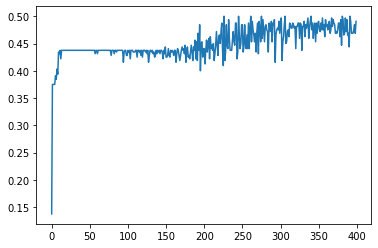

In [81]:
plt.plot(history.history['accuracy'])